# Answer to graded assignment 2 in DTE-2501 (AI Methods and Applications) about ensemble methods by Abdullah Karagøz

## Table of Contents
[Introduction](#00)
1. [Classes](#10)

    1.1 [Gaussian Naïve Bayes Classifier](#11)
    
    1.2 [Ensembled Classifier](#12)
    
    1.3 [Metrics class](#13)
    
2. [Testing and validation](#20)

    2.1 [Testing function](#21)
    
    2.2 [Function to plit performanece of ensembled classes](#22)
    
    2.3 [Testing some datasets](#23)
    
      2.3.1 [Iris dataset](#231)
        
      2.3.2 [Pima Indians Diabetes dataset](#232)
        
      2.3.3 [Sonar dataset](#233)
       
      2.3.4 [Banknotes dataset](#234)
        
      2.3.5 [Seeds dataset](#235)
      
3. [Conclusions](#3)

## Introduction <a name="00"></a>

In this assignment I test ensemble methods in classification. The ensemble methods use Gassian Naïve Bayes classifiers.Int

The goal is to test and show how a simple Gaussian Naïve Bayes classifier performs when used as stand alone versus used with ensemble method.

I first built all the classes and functions. Then uploading, testing and comparing was easy, so uploaded 5 different datasets including Iris dataset and report the performance results using Gaussian NB classifier and using ensembled method with Gaussian NB classifiers.

I built the classifiers and ensemble methods self, but compared results using my classes with using libraries from Scikit-learn libraries. I haven't used Scikit-learn in my classes. Scikit-learn classes are used only to compare.

Since teachers didn't allow using Numpy I didn't use Numpy in my code. The only place I used Numpy is when preparing train and test set to Scikit-learn libraries, as it needs Numpy as argument. The API of the classes I built looks a bit similar to Scikit-learn, but they're far from same. My intention wasn't to build classes with same API as classes from Scikit-learn.

**I have build 3 classes and 2 functions.**

**The classes are:**
* Gaussian Naïve Bayes classifier: The class only accepts data with numerical attributes. The classes must be turned into integers starting from 0.
* Ensemble Naïve Bayes classifier: The class accepts Gaussian Naïve Bayes classifiers I built. It uses two methods: majority voting and probability aggregation.
* Metrics class: A class with static functions that calculate Cross Entropy Loss, accuracy and F1 score.

**The functions are:**
* Testing function: Testing all the classifiers, both single and ensemble methods, using both majority voting and probability aggregation. It tests  Gaussian Naïve Bayes classifier and ensemble classifier from Scikit-learn too just for comparieon.Then it prints and compares the results using metrics like mean Cross Entropy Loss, F1 score and accuracy.
* Plotting function: This is testing only the ensemble methods, majority voting, probability aggregation, and class from Scikit-learn. It compares from 0 to N number of classifiers how perofrmance changes when you increase number of classifiers in the ensemble method.

In the code I have first built the classes and functions mentioned above. Then I have uploaded datasets and tested them.

## 1. Classes <a name="10"></a>

In [56]:
import pandas as pd
import numpy as np
from math import sqrt
from math import pi
from math import exp
from math import log
from math import fsum
import platform
platform.architecture()
import random

### 1.1 Gaussian Naïve Bayes Classifier <a name="11"></a>

The name of the class is NaiveBayesClassifier. It uses Gaussian probability density function, and it only accepts dataset with numerical attributes.

I have implemented both calculation with probabilities and log probabilities. In my tests they perform the same. A benefit of using log is preventing underflow. Also a value being soo low that the interpreter rounds it down to zero. When calculation probaiblities we muliply multiple values between 0 and 1. The result value could be too low that Python can't interpret it and round-down to zero. Using logarithmic values prevents that.

You first initialize the class. Then using fit() function you pass the dataset as the argument. It must be a Pandas Dataframe with numerical attributes only, and classes needs to be integers starting from 0. The classes must be saved on the last column.

The fit() function just calculates the prior-probabilities, mean and standard deviation values and other values that'll be used in the calculations. That's to avoid doing same calculation on every prediction. The standard deviation used is "Bessel corrected" where we divide the value by (N-1), which is common when calculating standard deviation on samples.



In [57]:
# Naive Bayes Classifier
class NaiveBayesClassifier():
    """
    This is a class for classification using Gaussian Naive Bayes classification where attributes
    are numerical.
      
    Attributes:
        train_set (Pandas Dataframe): the training dataset means, stds and other values are based on
        mean_values (list): contains mean values of all attributes for each class.
        std_values (list): contains standard deviation values of all attribtuets for each class
        prior_class_probabilities (list): contains prior class probabilities for each class
        nr_of_classes (int): number of classes the dataset has
        nr_of_attributes (int): number of attributes (columns) the dataset has
        proba (list): probabilities of the prediction from test set
        preds (list): predictions from test set
    """
    def __init__(self):
        """
        Initializing the NaiveBayesClassifier.
        """
        self.train_set = list()
        self.__mean_values = list()
        self.__std_values =  list()
        self.__prior_class_probabilities =  list()
        self.__nr_of_classes = 0
        self.__nr_of_attributes = 0
        self.__proba = list() # Output of class probabilities
        self.__preds = list() # Output of predictions
        self.__trained = False # Trained flag
        
        
    def fit(self, train_set):
        """
        Training the classifier.
        
        Initializing mean values, std values, prior probabilites, number of classes and attributes.
        
        Parameters:
            train_set (Pandas Dataframe): training samples where classes are 
                integers starting from 0, saved under last column.
        """
        self.train_set = train_set
        
        # if not in ensemble, we calculate these values
        self.__nr_of_classes=train_set.groupby(train_set.iloc[:,-1]).ngroups
        self.__nr_of_attributes=len(train_set.iloc[0,:-1])
        
        # Here we keep mean, std and prior class probability values
        self.__mean_values = list()
        self.__std_values = list()
        self.__prior_class_probs = list()
        
        # calculating mean, std values and prior probabilities of classes
        for i in range(self.__nr_of_classes):
            class_values = train_set[train_set.iloc[:,-1] == i] # All values for certain class
            prior_class_prob = len(class_values) / len(train_set)
            self.__prior_class_probs.append(prior_class_prob)
            mean_values = list()
            std_values = list()   
            for j in range(self.__nr_of_attributes):
                values = class_values.iloc[:,j].values.tolist()
                std, mean = self.__std_and_mean(values)
                mean_values.append(mean)
                std_values.append(std)
            self.__mean_values.append(mean_values)
            self.__std_values.append(std_values)
        
        self.__trained = True


    def __mean(self, val_list):
        """
        Getting the mean of the values.
        
        Parameters:
            val_list (int): list of values.
        
        returns:
            float: mean of the values.
        """
        return fsum(val_list) / len(val_list)
    
    
    def __std_and_mean(self, val_list):
        """
        Getting the mean and standard deviation of the values
        
        Parameters:
            val_list (int): list of values
        
        returns:
            (float, float): standard deviation and mean of the values
        """
        mu = self.__mean(val_list)
        std = sqrt(fsum([(x - mu)**2 for x in val_list]) / (len(val_list)-1))
        return std, mu
        
    
    def __gaussian_pdf(self, x, mu, sd, log_prob):
        """
        Calculating the probability with Gaussian PDF.
        
        Parameters:
            x (float): the value to claculated probability of with Gaussian PDF
            mu (float): mean value to be used in Gaussian PDF
            sd (float): standard devaition value to be used in Gaussian PDF
            log_prob (bool): set to True to use logarithm of the probability in claculations.
        
        Returns:
            (float): the probability value of x using Gaussian PDF.    
        """
        if log_prob:
            return_val = (-0.5*((x-mu)/sd)**2) - log(sd*sqrt(2*pi))
        else:
            return_val = (1 / (sd*sqrt(2*pi))) * exp(-0.5*((x-mu)/sd)**2)
        return return_val
    
    
    
    # Predicting classes on the test set
    def predict(self, test_set, log_prob = False):
        """
        Predicts the class of all samples in a test set
        
        Parameters:
            test_set (Pandas Dataframe): samples to be tested, where the class is in the last column, and
                other columns contain attribute values.
            log_prob (bool): set to True if you want to use logarithm of probabilities in calculations.
            
        Returns:
            list: predicted class labels.
        """
        if not self.__trained:
            raise Exception("The classifier is not trained yet, run fit() function by passing the training set.")
        probabilities = self.predict_proba(test_set, log_prob) # Getting the probabilities first
        
        self.__preds = [probs.index(max(probs)) for probs in probabilities] # Doing argmax for each probability
        
        return self.__preds

    
    
    # Predicting probabilities of the test set
    def predict_proba(self, test_set, log_prob=False):
        """
        Compute the probabilities of classes of all samples in a test set
        
        Parameters:
            test_set (Pandas Dataframe): samples to be tested, where the class is in the last column, and
                other columns contain attribute values.
            log_prob (bool): set to True if you want to use logarithm of probabilities in calculations.
            
        Returns:
            list: weighted average probability for each class per sample.
        """
        if not self.__trained:
            raise Exception("The classifier is not trained yet, run fit() function by passing the training set.")
        
        # Dividing the data into attributes and classes (Desired outputs)
        X_test = test_set.iloc[:, :-1].values.tolist()
        y_test = test_set.iloc[:, -1].values.tolist()
        
        probabilities = list()
        for x, y in zip(X_test, y_test):
            prob = self.probs_row(x, log_prob) # Calculating probabilities for each row
            probabilities.append(prob)
        self.__proba = probabilities
        
        return probabilities
    
    
    # Returning cache of probabilities saved
    def get_proba():
        """
        Get the computed probabilities cache.
        """
        if self.__proba:
            return self.__proba
        else:
            raise Exception("The probabilities are empty")
    
    
    # Calculating probabilities for each row
    def probs_row(self, row, log_prob = False):
        """
        Compute the probability of class for each sample.
        
        Parameters:
            row (list): a list of attributes of the class, all attributes must be numerical.
            log_prob (bool): Set to True if you want to use logarithm of probabilities in calculations.
        Returns:
            list: weighted probabilities of each label.
        """
        probs = self.__nr_of_classes*[0]
        
        if log_prob:
            for i in range(self.__nr_of_classes):
                probs[i] = 0 if self.__prior_class_probs[i] == 0 else log(self.__prior_class_probs[i])
                for j in range(len(row)):
                    probs[i] += self.__gaussian_pdf(row[j], self.__mean_values[i][j], self.__std_values[i][j], log_prob)
                probs[i] = exp(probs[i]) # Converting back from log(prob) to prob
        
        else: 
            for i in range(self.__nr_of_classes):
                probs[i] = self.__prior_class_probs[i]
                for j in range(len(row)):
                    probs[i] *= self.__gaussian_pdf(row[j], self.__mean_values[i][j], self.__std_values[i][j], log_prob)
                    
        probs = [x / fsum(probs) for x in probs] # Converting to real probabilities
        return probs
        
        

### 1.2 Ensembled Classifier <a name="12"></a>

The name of the class is EnsembledNBClassifier. When initializing it needs a parameter on how many classifiers to ensemble. It only accepts Gaussian Naive Bayes classifiers I have implemented above. On the fit() function it copies the training using for each classifier using bootstrapping and trains all the classifiers inside.

It has too predict and predict_proba functions that works as the class above. Both functions use a helper function named ´__get_all_probs´ which returns probabilities for each class from each classifier. This list of list of lists is then used in majority voting or probabilities aggregation. This class to has an option to use logarithm or not.

Whether to use majority voting or aggregate probabilities is determined when predicting (using 'predict' function) by setting "majority_vote" to True or False.

In [58]:
class EnsembledNBClassifier():  
    """
    This is a class for classification using by ensembling Gaussian Naive Bayes classifiers where attributes
    are numerical. It's using bagging method.
    
    Attributes:
        classifiers (list): where all NaiveBayesClassifier objects are kept
        proba (list): probabilities of the prediction from test set
        preds (list): predictions from test set
    """
    
    
    def __init__(self, nr_of_classifiers):
        """
        Initializing the NaiveBayesClassifier.
        
        Parameters:
            nr_of_classifiers (int): number of classifiers which the ensemble method will have.
        """
        self.classifiers = list()
        for i in range(nr_of_classifiers):
            self.classifiers.append(NaiveBayesClassifier())
        self.__proba = list()
        self.__preds = list()
        self.__trained = False # Trained flag
    
    
    
    def fit(self, train_set, seed=None):
        """
        Training all classifiers.
        
        Initializing mean values, std values, prior probabilites, number of classes and attributes.
        
        Parameters:
            train_set (Pandas Dataframe): training samples where classes are 
                integers starting from 0, saved under last column.
            seed (int): Set random seed while training to make it reproducible
        """
        random.seed(seed)
        # Bootstrapping and training classifiers
        for cl in self.classifiers:  
            random_state = random.randint(1,1000000)        
            bag = train_set.sample(frac=1, replace=True, random_state=random_state).reset_index(drop=True)
            cl.fit(bag)
        
        self.__trained = True
    
        
    
    def predict(self, test_set, majority_vote = False, log_prob = False):
        """
        Predicts the class of all samples in a test set using aggregated value or majoriy voting.
        
        Parameters:
            test_set (Pandas Dataframe): samples to be tested, where the class is in the last column, and
                other columns contain attribute values.
            majority_vote (bool): set to True if you want to use majority voting in prediction.
            log_prob (bool): set to True if you want to use logarithm of probabilities in calculations.
 
        Returns:
            list: predicted class labels.
        """
        if  not self.__trained:
            raise Exception("The classifier is not trained yet, run fit() function by passing the training set.")
        
        predictions = list()
        
        
        # Majority voting method
        if majority_vote:
            all_probs = self.__get_all_probs(test_set, log_prob)
            for probs in all_probs:
                preds = [prob.index(max(prob)) for prob in probs]
                pred = max(set(preds), key = lambda x: preds.count(x) + 0.1*random.random())
                predictions.append(pred)
        
        else:
            # Aggregated probabilities
            agg_probs = self.predict_proba(test_set, log_prob)
            predictions = [probs.index(max(probs)) for probs in agg_probs]
        
        self.__preds = predictions
        return self.__preds
            

    
    def predict_proba(self, test_set, log_prob = False):
        """
        Compute the probabilities of classes of all samples in a test set, using aggregated value.
        
        Parameters:
            test_set (Pandas Dataframe): samples to be tested, where the class is in the last column, and
                other columns contain attribute values.
            log_prob (bool): set to True if you want to use logarithm of probabilities in calculations.
            
        Returns:
            list: weighted average probability for each class per sample.
        """
        if not self.__trained:
            raise Exception("The classifier is not trained yet, run fit() function by passing the training set.")
        
        all_probs = self.__get_all_probs(test_set, log_prob)
        
        
        probabilities = list()
        # Using aggregated probabilities
        for probs in all_probs:
            # Arithmetic mean of all probabilities
            agg_probs = [fsum(x)/len(probs) for x in zip(*probs)]
            probabilities.append(agg_probs)

        self.__proba = probabilities
        return self.__proba
    
    
    def __get_all_probs(self, test_set, log_prob):
        """
        A helper function to get all weighted average probability for each 
        class per sample for each classifier.
        
        Parameters:
            test_set (Pandas Dataframe): samples to be tested, where the class is in the last column, and
                other columns contain attribute values.
                
            log_prob (bool): set to True if you want to use logarithm of probabilities in calculations.
            
        Returns:
            list: weighted average probability for each class per sample for each classifier.
        """
        # splitting the data
        X_test = test_set.iloc[:, :-1].values.tolist()
        y_test = test_set.iloc[:, -1].values.tolist()
        
        all_probs = list()
        
        for x, y in zip(X_test, y_test):
            probs = list() # Probs for a sample from each class

            for cl in self.classifiers:
                prob = cl.probs_row(x, log_prob) # predict each row
                probs.append(prob)
            
            all_probs.append(probs)
        return all_probs



### 1.3 Metrics class <a name="13"></a>

A simple class with static functions. The name of the class is Metircs.

While the goal of the classifier is to get as high accuracy as possible, I used other performance metrics too which can give more insight.
It has three functions: 
* Cross Entropy Loss: Accepts probabilites for each class as parameter along with alist of desired values. Another function
* Accuracy: Accepts predicet and desired results as parameter, just simply calculates accuracy and returns the value.
* F1 score. Same parametrs as accuracy function, but has a 'macro' boolean parameter too which is set to 'True' as default. If set True the function returns mean F1 score. If not then the function returns F1 score for each class.

There are other metrics to measure performance too, but I only implemnted the three above. I think these three gives enough insight on performance of the classifiers.

In [59]:
class Metrics():
    """
    This is a class to compute performace metrics of classifiers. 
    It has only static functions.
    """
    
    def get_cel(y_true, y_proba):
        """
        Computing mean Cross Entropy Loss
        
        Parameters:
            y_true (list): desired values from test set.
            y_proba (list): weighted average probability for each class per sample.
            
        Returns:
            float: Cross Entropy Loss value
        """
        cel = 0
        for probs, y in zip(y_proba, y_true):
            cel -= log(probs[y]) # Cross entropy loss
        
        cel = cel/len(y_true)
        
        return cel
    
    
    def get_accuracy(y_true, y_pred):
        """
        Computing accuracy
        
        Parameters:
            y_true (list): desired values from test set.
            y_proba (list): weighted average probability for each class per sample.
            
        Returns:
            float: Accuracy value.
        """
        corrects = 0
        for pred, y in zip(y_pred, y_true):
            corrects += (int(y == pred))
        
        accuracy = corrects / len(y_true)
        return accuracy
    
    
    def get_f1(y_true, y_pred, labels, macro=True):
        """
        Computing F1 score
        
        Parameters:
            y_true (list): desired values from test set.
            y_proba (list): weighted average probability for each class per sample.
            labels (int): How many labels does the class have
            average: set to 'macro' to return mean F1 score, 'micro' to return F1 score for each class.
            
        Returns:
            float or list: mean F1 score or F1 score for each class
        """
        precisions = labels*[0]
        recalls = labels*[0]
        conf_matr = [[0]*labels for x in range(labels)]
        
        f1 = labels*[0] # F1 scores for each class
        tp = labels*[0] # True positives
        fn = labels*[0] # False negatives
        fp = labels*[0] # False positives
        
        
        # Calculating TP, TN, FP, FN
        for pred, y in zip(y_pred, y_true):
            for i in range(labels):
                if i == pred == y:
                    tp[i] += 1
                elif i == pred != y:
                    fp[i] += 1
                elif i != pred and i == y:
                    fn[i] += 1
                        
        # Calculating F1 scores
        for i in range(labels):
            precisions[i] = tp[i] / (tp[i] + fp[i])
            recalls[i] = tp[i] / (tp[i] + fn[i])
            f1[i] = (2*precisions[i]*recalls[i]) /  (precisions[i]+recalls[i])
        
        
        if macro: # Return mean f1 score
            mean_f1 = fsum(f1)/labels
            return mean_f1
        else:
            return f1 # Return f1 for all classes
            
        
        

    
    
    

## 2. Testing and validation <a name="20"></a>

### 2.1 Testing function <a name="21"></a>

Function to test and print performance metrics on a datasets.

This function tests Gaussian Naive Bayes and ensemble methods with different methods N times,
and compares F1, accuracy and cross entropy loss between them. It prints the results using tabulate table.
The tests are:
* Single GNB from Sklearn
* Single GNB classifier without using log probs.
* Single GNB with using log probs
* Ensemble from Sklearn
* Ensemble using aggregated probabilities
* Ensemble using majority voting (cross entropy loss not available)

Parameters:
    dataset (Pandas Dataframe): the dataset to train and test on.
    nr_of_classifiers (int): Nr of classifiers ensemble methods will use
    train_test_split (float): The rate of the dataset that will be used for training.
    n (int): Number of tests.
    seed (int): Random state seed.
    log_prob (bool): Whether to use log prob or not on ensemble methods other than Sklearn.


In [60]:
# Testing n times and see average f1, accuracy and cel
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from tabulate import tabulate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def testing(dataset, nr_of_classifiers = 10, train_test_split = 0.8, n=1, seed=None, log_prob=True):
    """
    Function to test and print performance metrics on a datasets.
    
    This function tests Gaussian Naive Bayes and ensemble methods with different methods N times,
    and compares F1, accuracy and cross entropy loss between them. It prints the results using tabulate table.
    The tests are:
    
    * Single GNB from Sklearn
    * Single GNB classifier without using log probs.
    * Single GNB with using log probs
    * Ensemble from Sklearn
    * Ensemble using aggregated probabilities
    * Ensemble using majority voting (cross entropy loss not available)

    Parameters:
        dataset (Pandas Dataframe): the dataset to train and test on.
        nr_of_classifiers (int): Nr of classifiers ensemble methods will use
        train_test_split (float): The rate of the dataset that will be used for training.
        n (int): Number of tests.
        seed (int): Random state seed.
        log_prob (bool): Whether to use log prob or not on ensemble methods other than Sklearn.
     """
    
    
    nr_of_classes = dataset.groupby(dataset.iloc[:,-1]).ngroups

    # All will be list of 3 lists, each of sub-list will be for accyracy, F1 and Cel.
    tests_single_skl = [[] for i in range(3)]
    tests_single = [[] for i in range(3)]
    tests_single_log = [[] for i in range(3)]

    tests_ensemble_skl = [[] for i in range(3)]
    tests_ensemble_voting = [[] for i in range(3)]
    tests_ensemble_aggr = [[] for i in range(3)]


    for i in range(n):
        # Shuffle and split data into training 80% and testing 20%
        train_set = dataset.sample(frac=train_test_split, random_state=seed)
        test_set = dataset.drop(train_set.index)
        train_set.reset_index(drop=True, inplace=True)
        test_set.reset_index(drop=True, inplace=True)

        y_true = test_set.iloc[:,-1].values.tolist()

        # Prepare the Numpy array which will be used in Sklearn libraries
        X_train = train_set.iloc[:,:-1].to_numpy()
        y_train = train_set.iloc[:,-1].to_numpy().astype('int')
        X_test = test_set.iloc[:,:-1].to_numpy()
        y_test = test_set.iloc[:,-1].to_numpy().astype('int')

        # From Sci-kit learn
        nbc = GaussianNB()
        nbc.fit(X_train, y_train)

        y_pred = nbc.predict(X_test)
        Y_proba = nbc.predict_proba(X_test)

        tests_single_skl[0].append(Metrics.get_accuracy(y_true, y_pred))
        tests_single_skl[1].append(Metrics.get_f1(y_true, y_pred, nr_of_classes))
        tests_single_skl[2].append(Metrics.get_cel(y_true, Y_proba))

        # Single classifier initialize
        nbc = NaiveBayesClassifier()
        nbc.fit(train_set)

        # Single classifier without using log
        y_pred = nbc.predict(test_set)
        Y_proba = nbc.predict_proba(test_set)

        tests_single[0].append(Metrics.get_accuracy(y_true, y_pred))
        tests_single[1].append(Metrics.get_f1(y_true, y_pred, nr_of_classes))
        tests_single[2].append(Metrics.get_cel(y_true, Y_proba))
        

        # Single classifier with using log
        y_pred = nbc.predict(test_set, log_prob=True)
        Y_proba = nbc.predict_proba(test_set, log_prob=True)

        tests_single_log[0].append(Metrics.get_accuracy(y_true, y_pred))
        tests_single_log[1].append(Metrics.get_f1(y_true, y_pred, nr_of_classes))
        tests_single_log[2].append(Metrics.get_cel(y_true, Y_proba))


        # Initializing and training ensemble of Sci-kit Learn
        ens_nbc = BaggingClassifier(GaussianNB(), n_estimators=nr_of_classifiers, random_state=seed)
        ens_nbc.fit(X_train, y_train)


        y_pred = ens_nbc.predict(X_test)
        Y_proba = ens_nbc.predict_proba(X_test)

        tests_ensemble_skl[0].append(Metrics.get_accuracy(y_true, y_pred))
        tests_ensemble_skl[1].append(Metrics.get_f1(y_true, y_pred, nr_of_classes))
        tests_ensemble_skl[2].append(Metrics.get_cel(y_true, Y_proba))


        #Initializing and training ensemble classifier I built
        ens_nbc = EnsembledNBClassifier(nr_of_classifiers)
        ens_nbc.fit(train_set, seed)

        # Ensembled classifier using majority vote
        y_pred = ens_nbc.predict(test_set, majority_vote = True, log_prob=log_prob)

        tests_ensemble_voting[0].append(Metrics.get_accuracy(y_true, y_pred))
        tests_ensemble_voting[1].append(Metrics.get_f1(y_true, y_pred, nr_of_classes))

        # Ensembled classifier using aggregated probabilities
        y_pred = ens_nbc.predict(test_set, log_prob=log_prob)
        Y_proba = ens_nbc.predict_proba(test_set, log_prob=log_prob)

        tests_ensemble_aggr[0].append(Metrics.get_accuracy(y_true, y_pred))
        tests_ensemble_aggr[1].append(Metrics.get_f1(y_true, y_pred, nr_of_classes))
        tests_ensemble_aggr[2].append(Metrics.get_cel(y_true, Y_proba))
        


    # Calculating means from the lists

    mean_results = [[] for x in range(6)]

    mean_results[0].append('Single classifier Sklearn')
    mean_results[1].append('Single classifier')
    mean_results[2].append('Single classifier with log prob')
    mean_results[3].append('Ensemble classifier Sklearn')
    mean_results[4].append('Ensemble classifier with majority voting')
    mean_results[5].append('Ensemble classifier with aggregated probabilities')

    for i in range(3):
        mean_results[0].append(fsum(tests_single_skl[i]) / n)
        mean_results[1].append(fsum(tests_single[i]) / n)
        mean_results[2].append(fsum(tests_single_log[i]) / n)
        mean_results[3].append(fsum(tests_ensemble_skl[i]) / n)
        mean_results[4].append(fsum(tests_ensemble_voting[i]) / n)
        mean_results[5].append(fsum(tests_ensemble_aggr[i]) / n)
    
    mean_results[4][3] = ('N/A')

    comparison_table = tabulate(mean_results, 
                                headers=['Accuracy', 'F1 Score', 'Cross Entropy Loss'], floatfmt=".4f")
    

    print(comparison_table)


### 2.2 Function to plot performance of ensembled classes <a name="22"></a>

Function to test and plot results of ensemble methods with different nr of classifiers.

This function tests performance of ensemble methods with  Gaussian Naive Bayes classifier,
plots the results of the test from 1 to N number of classifiers. The performance metrics are,
F1, accuracy and cross entropy loss.

We compare these 3 classifiers:
* Ensemble from Sklearn
* Ensemble using aggregated probabilities
* Ensemble using majority voting (cross entropy loss not available)

Parameters:
* dataset (Pandas Dataframe): the dataset to train and test on.
* nr_of_classifiers (int): Max nr of classifiers ensemble methods will use.
* train_test_split (float): The rate of the dataset that will be used for training.
* seed (int): Random state seed.
* log_prob (bool): Whether to use log prob or not on ensemble methods other than Sklearn.

It doesn't show Cross Entropy Loss for ensemble method with majority voting. That is because it's not based on probabilities from each classifier, but predictions from each classifier. Also the predicting each case is based on "votes" from classifiers, where "votes" are prediction of each classifier is counted as one "vote".

In [61]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec



def plotting_ensemble(dataset, nr_of_classifiers, train_test_split, seed=None, log_prob=True):
    """
    Function to test and plot results of ensemble methods with different nr of classifiers.
    
    This function tests performance of ensemble methods with  Gaussian Naive Bayes classifier,
    plots the results of the test from 1 to N number of classifiers. The performance metrics are,
    F1, accuracy and cross entropy loss.
    
    * Ensemble from Sklearn
    * Ensemble using aggregated probabilities
    * Ensemble using majority voting (cross entropy loss not available)

    Parameters:
        dataset (Pandas Dataframe): the dataset to train and test on.
        nr_of_classifiers (int): Max nr of classifiers ensemble methods will use.
        train_test_split (float): The rate of the dataset that will be used for training.
        seed (int): Random state seed.
        log_prob (bool): Whether to use log prob or not on ensemble methods other than Sklearn.
     """
    
    nr_of_classes = dataset.groupby(dataset.iloc[:,-1]).ngroups
    
    # Shuffle and split data into training 80% and testing 20%
    train_set = dataset.sample(frac=train_test_split, random_state=seed)
    test_set = dataset.drop(train_set.index)
    train_set.reset_index(drop=True, inplace=True)
    test_set.reset_index(drop=True, inplace=True)

    y_true = test_set.iloc[:,-1].values.tolist()

    # Prepare the Numpy array which will be used in Sklearn libraries
    X_train = train_set.iloc[:,:-1].to_numpy()
    y_train = train_set.iloc[:,-1].to_numpy().astype('int')
    X_test = test_set.iloc[:,:-1].to_numpy()
    y_test = test_set.iloc[:,-1].to_numpy().astype('int')


    f1_results = [[] for i in range(3)]
    cel_results = [[] for i in range(3)]
    acc_results = [[] for i in range(3)]
    
    for n in range(1, nr_of_classifiers+1):
        # Initializing and training ensemble of Sci-kit Learn
        ens_nbc = BaggingClassifier(GaussianNB(), n_estimators=n, random_state=seed)
        ens_nbc.fit(X_train, y_train)

        y_pred = ens_nbc.predict(X_test)
        Y_proba = ens_nbc.predict_proba(X_test)

        acc_results[0].append(Metrics.get_accuracy(y_true, y_pred))
        f1_results[0].append(Metrics.get_f1(y_true, y_pred, nr_of_classes))
        cel_results[0].append(Metrics.get_cel(y_true, Y_proba))


        #Initializing and training ensemble classifier I built
        ens_nbc = EnsembledNBClassifier(n)
        ens_nbc.fit(train_set, seed)
        
        # Ensembled classifier using aggregated probabilities
        y_pred = ens_nbc.predict(test_set, log_prob=log_prob)
        Y_proba = ens_nbc.predict_proba(test_set, log_prob=log_prob)

        acc_results[1].append(Metrics.get_accuracy(y_true, y_pred))
        f1_results[1].append(Metrics.get_f1(y_true, y_pred, nr_of_classes))
        cel_results[1].append(Metrics.get_cel(y_true, Y_proba))


        
        # Ensembled classifier using majority vote
        y_pred = ens_nbc.predict(test_set, majority_vote = True, log_prob=log_prob)

        acc_results[2].append(Metrics.get_accuracy(y_true, y_pred))
        f1_results[2].append(Metrics.get_f1(y_true, y_pred, nr_of_classes))

     
    width = 0.25
    x_ticks = [x+1 for x in range(nr_of_classifiers)]
    x_1 = [x+1 for x in range(nr_of_classifiers)]
    x_2 = [x+1+width for x in range(nr_of_classifiers)]
    x_3 = [x+1+width*2 for x in range(nr_of_classifiers)]
    
    
    fig = plt.figure(figsize=(15,10))
    
    # Create 2x2 sub plots
    gs = gridspec.GridSpec(2, 2)

    
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.bar(x_1, acc_results[0], width=width, label='Sklearn')
    ax1.bar(x_2, acc_results[1], width=width, label='Aggregation')
    ax1.bar(x_3, acc_results[2], width=width, label='Majority voting')
    ax1.set_ylabel("Accuracy")
    ax1.set_xlabel("Nr of estimators")
    ax1.set_title("Accuracy")
    ax1.grid()
    ax1.set_ylim(min(acc_results[0] + acc_results[1] + acc_results[2]) - 0.1)

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.bar(x_1, f1_results[0], width=width, label='Sklearn')
    ax2.bar(x_2, f1_results[1], width=width, label='Aggregation')
    ax2.bar(x_3, f1_results[2], width=width, label='Majority voting')
    ax2.set_ylabel("F1 score")
    ax2.set_xlabel("Nr of estimators")
    ax2.set_title("F1 score")
    ax2.grid()
    ax2.set_ylim(min(f1_results[0] + f1_results[1] + f1_results[2]) - 0.1)

    ax3 = fig.add_subplot(gs[1, 0])
    ax3.bar(x_1, cel_results[0], width=width, label='Sklearn')
    ax3.bar(x_2, cel_results[1], width=width, label='Aggregation')
    ax3.set_ylabel("CEL")
    ax3.set_xlabel("Nr of estimators")
    ax3.set_title("Cross Entropy Loss")
    ax3.grid()
    ax3.set_ylim(min(cel_results[0] + cel_results[1]) - 0.1)
    
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(0.5, 0.1, 0.1, 0.4))

    fig.suptitle('Performance of ensemble methods', fontsize=16)
    plt.show()
    

### 2.3 Testing some datasets <a name="23"></a>

After preparing all classes and functions, now it's easy to test and report performance results.

I will try with 10 classifiers, and the dataset will be split on a 4:1 rate, also 80 % on training and 20 % on testing.

We use a seed on the random too, that's to make it reproducible.

First I test on the Iris Dataset as the assignment was about, then I run the test three other datasets.

I have only used small datasets that are clean so I don't need to preprocess and clean-up it. By clean data I mean it has no NaNs, no missing values etc.


After uploading the data on Pandas Dataframe, before running the test I have make small edits so that all classes are represented as integers starting from 0.

In [62]:
# Parameters in test
nr_of_tests = 1 # Nr of tests to make
nr_of_classifiers = 10
train_test_split = 0.8
seed = 15
random.seed(seed)

#### 2.3.1 Iris Dataset <a name="231"></a>

This dataset is about predicting class of Iris plant based on sepal and petal length and width.

In [63]:

# Load the data
dataset_iris = pd.read_csv('iris.data', header=None, names=['sepal length', 'sepal width',
                                                     'petal length', 'petal width',
                                                     'class'])

In [64]:
#Assign label to each class
dataset_iris.loc[dataset_iris['class'] == 'Iris-setosa', dataset_iris.columns == 'class'] = 0
dataset_iris.loc[dataset_iris['class'] == 'Iris-versicolor', dataset_iris.columns == 'class'] = 1
dataset_iris.loc[dataset_iris['class'] == 'Iris-virginica', dataset_iris.columns == 'class'] = 2

In [65]:
testing(dataset_iris, nr_of_classifiers, train_test_split, nr_of_tests, seed)

                                                     Accuracy    F1 Score  Cross Entropy Loss
-------------------------------------------------  ----------  ----------  --------------------
Single classifier Sklearn                              0.9000      0.8947  0.19965164385510778
Single classifier                                      0.9333      0.9296  0.1973915486611517
Single classifier with log prob                        0.9333      0.9296  0.1973915486611517
Ensemble classifier Sklearn                            0.9000      0.8947  0.16558758785523534
Ensemble classifier with majority voting               0.9000      0.8947  N/A
Ensemble classifier with aggregated probabilities      0.9000      0.8947  0.1968848475249782


We see that ensemble methods doesn't perform better than single classifier in terms of accuracy. But we can only see that the Cross Entropy Loss is reduced with ensemble than with single classifier.

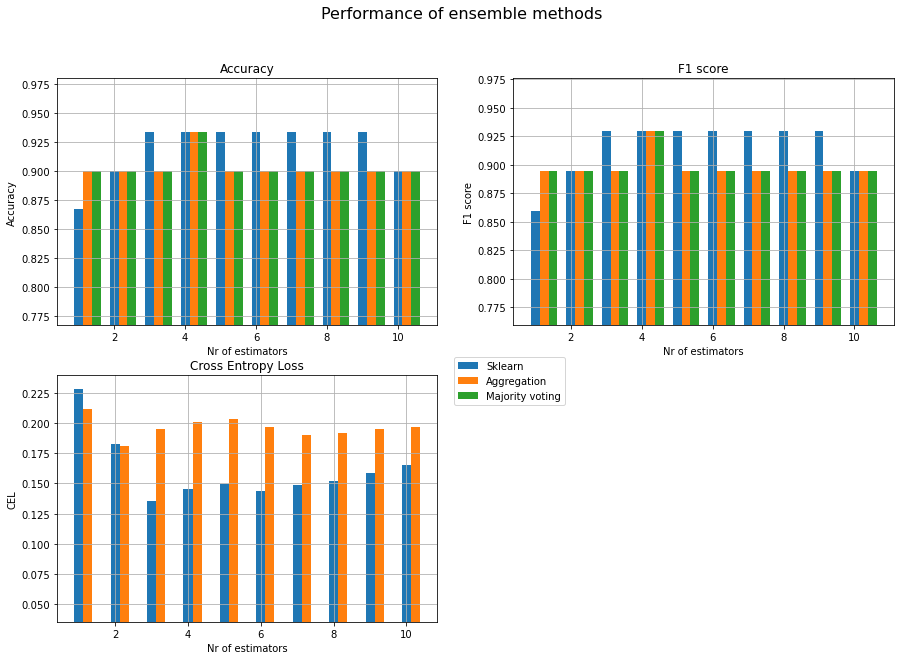

In [66]:
plotting_ensemble(dataset_iris, nr_of_classifiers, train_test_split, seed)

From the plots we see that the results are almost same with or without ensemble. But we see again some reduction of CEL when we increase number of classifiers. But the decrease of CEL is not always proportional to increase of number of classifiers in the ensemble method.

The results also vary depending on how many test you make and the seed value too.

#### 2.3.2 Pima Indians Diabetes Dataset <a name="232"></a>

This is about classifying who has diabetes or not given som data.

In [67]:

# Load the data
dataset_pima = pd.read_csv('pima-indians-diabetes.csv', header=None, names=['Number of times pregnant', 
                                                                        'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
                                                                        'Diastolic blood pressure (mm Hg)',
                                                                        'Triceps skin fold thickness (mm)',
                                                                        '2-Hour serum insulin (mu U/ml)',
                                                                        'Body mass index (weight in kg/(height in m)^2)',
                                                                        'Diabetes pedigree function',
                                                                        'Age (years)',
                                                                        'class'],)


In [68]:
testing(dataset_pima, nr_of_classifiers, train_test_split, nr_of_tests, seed)

                                                     Accuracy    F1 Score  Cross Entropy Loss
-------------------------------------------------  ----------  ----------  --------------------
Single classifier Sklearn                              0.7208      0.6947  0.5563284230219286
Single classifier                                      0.7143      0.6863  0.5569817050475522
Single classifier with log prob                        0.7143      0.6863  0.5569817050475517
Ensemble classifier Sklearn                            0.7273      0.6979  0.5634045651173961
Ensemble classifier with majority voting               0.7143      0.6889  N/A
Ensemble classifier with aggregated probabilities      0.7338      0.7113  0.543331205650138


 Here we see some increase in the accuracy using ensemble methods and decrease of loss.

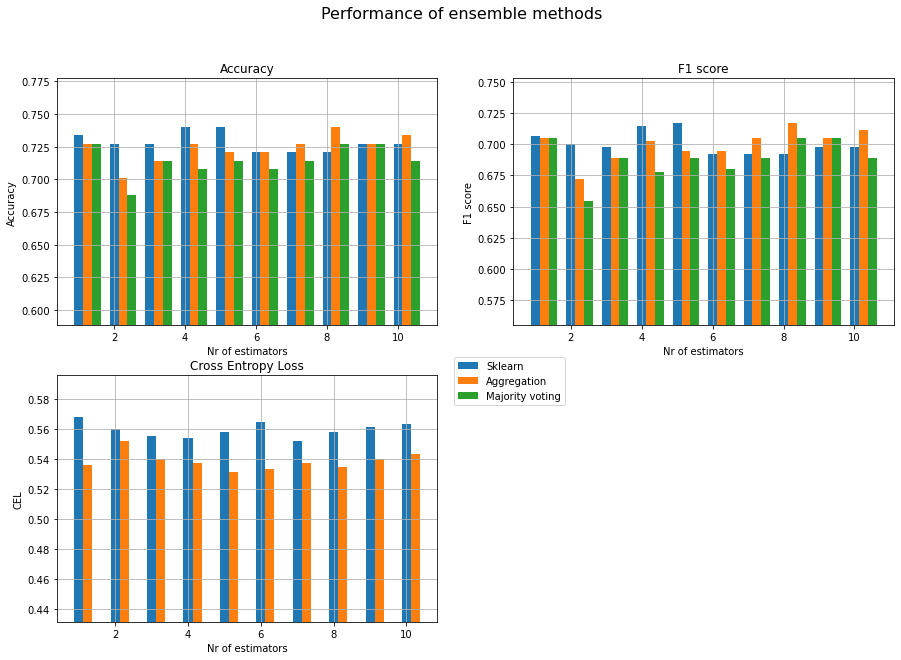

In [69]:
plotting_ensemble(dataset_pima, nr_of_classifiers, train_test_split, seed)

Again while we see that increasing number of classifiers improve performance, that's not always the case.

Below we have used some other datasets and tested on them.

#### 2.3.3 Sonar data set <a name="233"></a>

This is about predicting if it's a rock 'R' or a mine 'M' based on some numerical attributes. Those datasets had no column names, and I don't add column names because it's not that important.

In [70]:
# Sonar dataset
dataset_sonar = pd.read_csv('sonar.all-data', header=None)

dataset_sonar.iloc[dataset_sonar.iloc[:, -1] == 'R', -1] = 0
dataset_sonar.iloc[dataset_sonar.iloc[:, -1] == 'M', -1] = 1

In [71]:
testing(dataset_sonar, nr_of_classifiers, train_test_split, nr_of_tests, seed)

                                                     Accuracy    F1 Score  Cross Entropy Loss
-------------------------------------------------  ----------  ----------  --------------------
Single classifier Sklearn                              0.6190      0.6190  6.553844551103352
Single classifier                                      0.6190      0.6190  6.475141435433595
Single classifier with log prob                        0.6190      0.6190  6.475141435433595
Ensemble classifier Sklearn                            0.6190      0.6190  3.97867053717397
Ensemble classifier with majority voting               0.6190      0.6190  N/A
Ensemble classifier with aggregated probabilities      0.6190      0.6190  4.7482063309119145


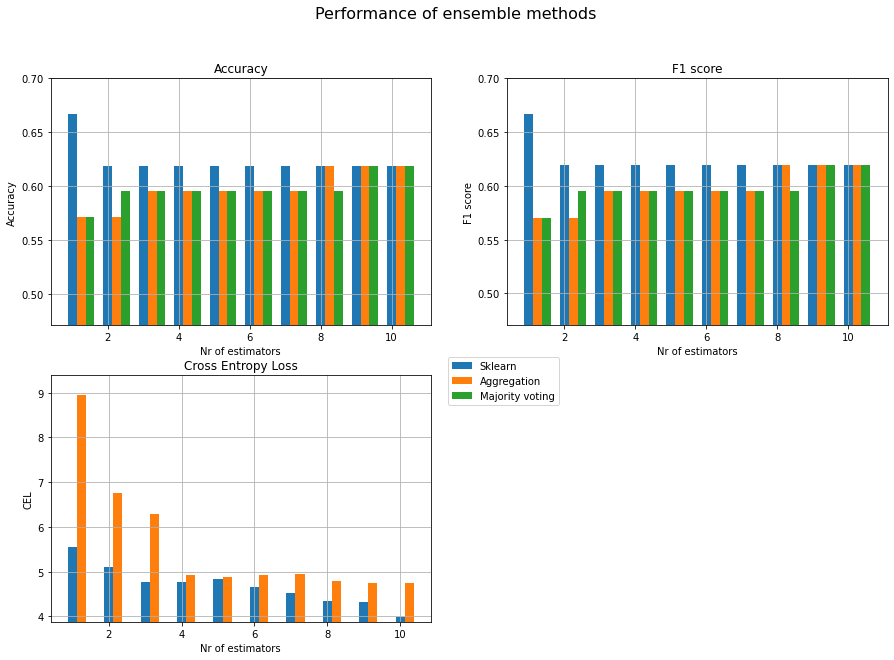

In [72]:
plotting_ensemble(dataset_sonar, nr_of_classifiers, train_test_split, seed)

#### 2.3.4 Banknotes dataset <a name="234"></a>

This is about predicting if the Banknotes are real or fake based on some attributes.

In [73]:
# Banknotes dataset
dataset_banknote = pd.read_csv('data_banknote_authentication.txt', header=None)

dataset_banknote

0         1        2        3  4
0     3.62160   8.66610  -2.8073 -0.44699  0
1     4.54590   8.16740  -2.4586 -1.46210  0
2     3.86600  -2.63830   1.9242  0.10645  0
3     3.45660   9.52280  -4.0112 -3.59440  0
4     0.32924  -4.45520   4.5718 -0.98880  0
...       ...       ...      ...      ... ..
1367  0.40614   1.34920  -1.4501 -0.55949  1
1368 -1.38870  -4.87730   6.4774  0.34179  1
1369 -3.75030 -13.45860  17.5932 -2.77710  1
1370 -3.56370  -8.38270  12.3930 -1.28230  1
1371 -2.54190  -0.65804   2.6842  1.19520  1

[1372 rows x 5 columns]

In [74]:
testing(dataset_banknote, nr_of_classifiers, train_test_split, nr_of_tests, seed)

                                                     Accuracy    F1 Score  Cross Entropy Loss
-------------------------------------------------  ----------  ----------  --------------------
Single classifier Sklearn                              0.8540      0.8481  0.328565554484862
Single classifier                                      0.8540      0.8481  0.32847280381980176
Single classifier with log prob                        0.8540      0.8481  0.3284728038198017
Ensemble classifier Sklearn                            0.8504      0.8445  0.3285471335044385
Ensemble classifier with majority voting               0.8540      0.8481  N/A
Ensemble classifier with aggregated probabilities      0.8504      0.8445  0.33356178712829887


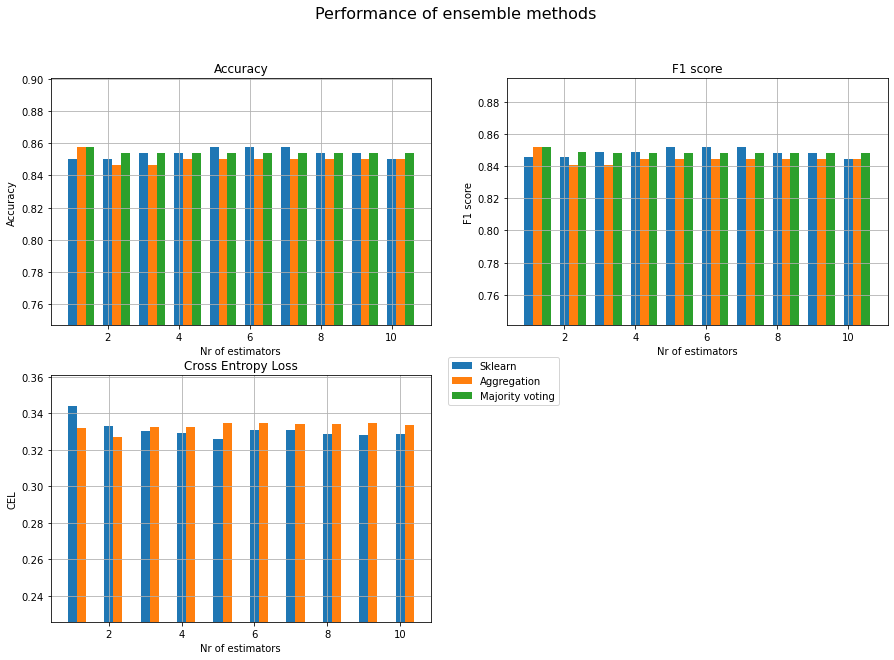

In [75]:
plotting_ensemble(dataset_banknote, nr_of_classifiers, train_test_split, seed)

#### 2.3.5 Seeds dataset <a name="235"></a>
It's about classifying seeds given some attributes.

In [76]:
# Seeds dataset
dataset_seeds = pd.read_csv('seeds_dataset.txt', delimiter='\t', header=None)

dataset_seeds

0      1       2      3      4      5      6  7
0    15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1    14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2    14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3    13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4    16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
..     ...    ...     ...    ...    ...    ...    ... ..
205  12.19  13.20  0.8783  5.137  2.981  3.631  4.870  3
206  11.23  12.88  0.8511  5.140  2.795  4.325  5.003  3
207  13.20  13.66  0.8883  5.236  3.232  8.315  5.056  3
208  11.84  13.21  0.8521  5.175  2.836  3.598  5.044  3
209  12.30  13.34  0.8684  5.243  2.974  5.637  5.063  3

[210 rows x 8 columns]

In [77]:
# Making sure the class labels start from 0 and not from 1.
dataset_seeds.iloc[dataset_seeds.iloc[:, -1] == 1, -1] = 0
dataset_seeds.iloc[dataset_seeds.iloc[:, -1] == 2, -1] = 1
dataset_seeds.iloc[dataset_seeds.iloc[:, -1] == 3, -1] = 2
dataset_seeds

0      1       2      3      4      5      6  7
0    15.26  14.84  0.8710  5.763  3.312  2.221  5.220  0
1    14.88  14.57  0.8811  5.554  3.333  1.018  4.956  0
2    14.29  14.09  0.9050  5.291  3.337  2.699  4.825  0
3    13.84  13.94  0.8955  5.324  3.379  2.259  4.805  0
4    16.14  14.99  0.9034  5.658  3.562  1.355  5.175  0
..     ...    ...     ...    ...    ...    ...    ... ..
205  12.19  13.20  0.8783  5.137  2.981  3.631  4.870  2
206  11.23  12.88  0.8511  5.140  2.795  4.325  5.003  2
207  13.20  13.66  0.8883  5.236  3.232  8.315  5.056  2
208  11.84  13.21  0.8521  5.175  2.836  3.598  5.044  2
209  12.30  13.34  0.8684  5.243  2.974  5.637  5.063  2

[210 rows x 8 columns]

In [78]:
testing(dataset_seeds, nr_of_classifiers, train_test_split, nr_of_tests, seed)

                                                     Accuracy    F1 Score  Cross Entropy Loss
-------------------------------------------------  ----------  ----------  --------------------
Single classifier Sklearn                              0.8571      0.8636  0.534806378177639
Single classifier                                      0.8571      0.8636  0.5252295269362355
Single classifier with log prob                        0.8571      0.8636  0.5252295269362355
Ensemble classifier Sklearn                            0.8571      0.8636  0.4297190862741268
Ensemble classifier with majority voting               0.8333      0.8403  N/A
Ensemble classifier with aggregated probabilities      0.8333      0.8403  0.4690523155215268


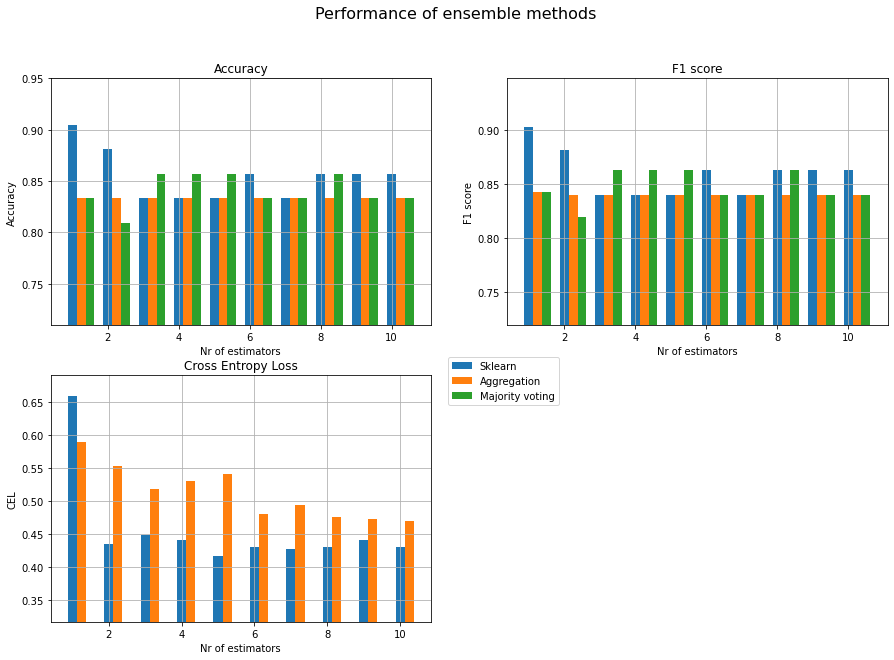

In [79]:
plotting_ensemble(dataset_seeds, nr_of_classifiers, train_test_split, seed)

## 3. Conclusions <a name="3"></a>
I expected that ensembled classifiers would always outperform single classifiers in all performance metrics. But this is not what I got.

The results are similar to each other. One can see that when measured with Cross Entropy Loss ensemble methods usually perform better than single classifiers. But else it's hard to conclude ensembled classifiers here performed better than single classifier.

The reason for why the ensembled Naïve Bayes classifiers doesn't always perform better than single NB classifiers are two things:
* **Naïve Bayes classifier is a high-bias classifier.** It means it's common for NB classifier to have errors. That is because it uses very simple mathematical formulas to predict classes. This can't represent complex situations. Ensemble methods don't improve when used with such high-bias classifiers because all classifiers "acts same". When all the articles you read are same, it doesn't make much difference whether you read one or ten articles. When the whole crownd thinks the same, the crowd doesn't make better predictions than a single person.

* **The dataset lacks mariginals.** Marginal values are the cases where it looks more like class A but is in class B. Those are difficult to predict. But the datasets lack marginals. Also each test case is very clearly a member of its class, it's relatively easy to predict which case belongs to which class. Thus almost all classifiers in the ensemble give same prediction for almost all cases. This causes the lack of performance difference between ensemble and single classifier. If the task is easy to predict, then it doesn't improve by having more persons to make a prediction.